In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
data=pd.read_excel('Data_Train.xlsx',na_values={'null bhp'})

In [4]:
data.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [5]:
data['Mileage']=data['Mileage'].str.replace('kmpl','').str.replace('km/kg','')
data['Engine']=data['Engine'].str.replace('CC','')
data['Power']=data['Power'].str.replace('bhp','')
data.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [6]:
print(data.info())
#we should clean power (change the null values to nan)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5876 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB
None


In [7]:
data['Mileage']=data['Mileage'].astype(float)
data['Engine']=data['Engine'].astype(float)
data['Power']=data['Power'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


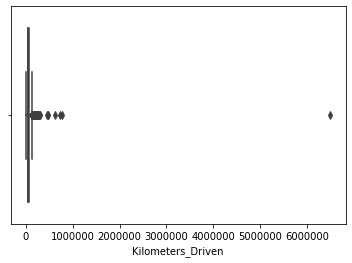

In [8]:
ax = sns.boxplot(x=data["Kilometers_Driven"])
# outlier

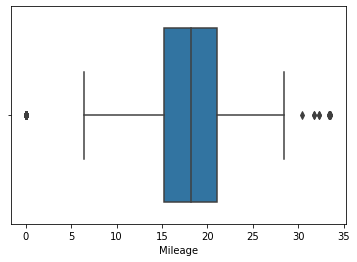

In [9]:
ax = sns.boxplot(x=data["Mileage"])
# outlier at zero 


In [10]:
data=data[data["Mileage"]!=0]
data=data[data["Kilometers_Driven"]<6000000]
# removed outliers

In [11]:
data.isna().sum()
# power has the most missing values

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                25
Power                104
Seats                 30
Price                  0
dtype: int64

In [12]:
data['Fuel_Type'].value_counts()

Diesel      3177
Petrol      2705
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

C:\Users\Peehu\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Peehu\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([8.770e+02, 2.584e+03, 9.500e+02, 6.840e+02, 4.710e+02, 1.070e+02,
        1.090e+02, 2.700e+01, 1.300e+01, 8.000e+00, 5.000e+00, 5.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00]),
 array([ 34.2       ,  69.25333333, 104.30666667, 139.36      ,
        174.41333333, 209.46666667, 244.52      , 279.57333333,
        314.62666667, 349.68      , 384.73333333, 419.78666667,
        454.84      , 489.89333333, 524.94666667, 560.        ]),
 <a list of 15 Patch objects>)

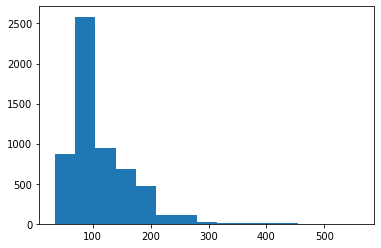

In [13]:
plt.hist(data["Power"].astype('float'),bins=15)

(array([  26., 2319., 1829., 1086.,  606.,   31.,    8.,   12.,    4.,
           4.]),
 array([  72. ,  664.6, 1257.2, 1849.8, 2442.4, 3035. , 3627.6, 4220.2,
        4812.8, 5405.4, 5998. ]),
 <a list of 10 Patch objects>)

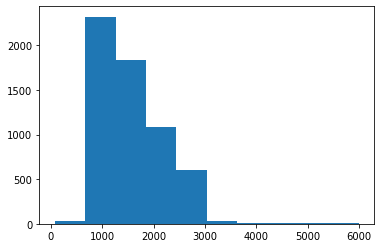

In [14]:
plt.hist(data["Engine"].astype('float'))

[1, 15, 0, 99, 4962, 29, 674, 133, 3, 4]


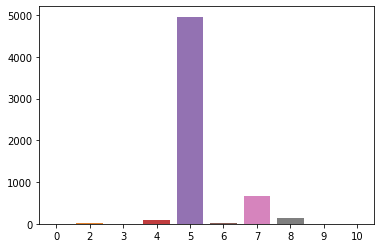

In [15]:
seat=data.groupby('Seats')
x1=[0,2,3,4,5,6,7,8,9,10]
n=[]
for i in x1:
    n.append(data.Seats[data['Seats']==i].count())
print(n)
sns.barplot(x1,n)
plt.show()

In [16]:
# filling missing values

In [17]:
data['Seats'].isna().sum()
data["Seats"].fillna(5,inplace=True)

In [18]:
data["Power"].fillna(np.mean(data['Power']),inplace=True)

In [19]:
data["Engine"].fillna(np.mean(data['Engine']),inplace=True)

In [20]:
data["Mileage"].fillna(17,inplace=True)

In [21]:
data.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

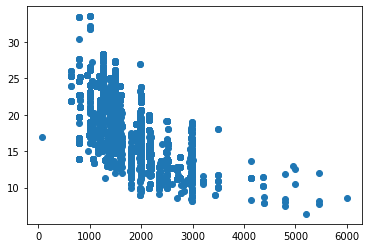

In [22]:
plt.scatter(data['Engine'],data['Mileage'])

In [23]:
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
train=data
test=pd.read_excel('Data_Test.xlsx')
train['Type']='Train' #Create a flag for Train and Test Data set
test['Type']='Test'
fullData = pd.concat([train,test],axis=0) #Combined both Train and Test Data set

In [25]:
fullData.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Type
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,Train
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,Train
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,Train
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Train
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,Train


In [26]:
ID_col = ['Name']
target_col = ["Price"]
cat_cols = ['Location','Year','Fuel_Type','Transmission','Owner_Type','Seats']
num_cols= ['Kilometers_Driven','Mileage','Engine','Power']
other_col=['Type']

In [27]:
for var in cat_cols:
 number = LabelEncoder()
 fullData[var] = number.fit_transform(fullData[var].astype('str'))

#Target variable is also a categorical so convert it
fullData["Price"] = number.fit_transform(fullData["Price"].astype('str'))

train=fullData[fullData['Type']=='Train']
test=fullData[fullData['Type']=='Test']

train['is_train'] = np.random.uniform(0, 1, len(train)) <= .75
Train, Validate = train[train['is_train']==True], train[train['is_train']==False]

C:\Users\Peehu\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [28]:
features=list(set(list(fullData.columns))-set(ID_col)-set(target_col)-set(other_col))
x_train = Train[list(features)].values
y_train = Train["Price"].values
x_validate = Validate[list(features)].values
y_validate = Validate["Price"].values
x_test=test[list(features)].values
random.seed(100)
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)


MemoryError: could not allocate 75169792 bytes